Nesse exércicio iremos consumir dados de uma planilha sobre Filmes.

In [34]:
# Importando as bibliotecas

from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
# Iniciando uma sessão Spark
spark = SparkSession.builder.appName("Análise de dados").getOrCreate()

In [36]:
# Carregar o arquivo excel
df = pd.read_excel("/content/Filmes.xlsx")
spark_df = spark.createDataFrame(df)

In [37]:
# Mostrar o esquema do DataFrame Spark

spark_df.printSchema()

spark_df.show()

root
 |-- id: long (nullable = true)
 |-- Nome Filme: string (nullable = true)
 |-- Genero: string (nullable = true)
 |-- Ano lançamento: long (nullable = true)
 |-- Avaliações: long (nullable = true)
 |-- Preço: double (nullable = true)
 |-- Plataforma Disponibilizada  : string (nullable = true)

+---+--------------------+-----------------+--------------+----------+-----+----------------------------+
| id|          Nome Filme|           Genero|Ano lançamento|Avaliações|Preço|Plataforma Disponibilizada  |
+---+--------------------+-----------------+--------------+----------+-----+----------------------------+
|  1|           A Chegada|Ficção Científica|          2016|         4|  9.9|        Google Play Filmes  |
|  2|        interestelar|Ficção Científica|          2014|         5| 12.9|                  Apple TV  |
|  3| Mad Max: Estrada...|             Ação|          2015|         4|  7.9|        Amazon Prime Video  |
|  4|             Dunkirk|           Guerra|          2017|      

In [38]:
# Ordenando a tabela : Filme mais caro

filmes_mais_caros = spark_df.orderBy(spark_df['Preço'].desc())
print("Filmes mais caros : ", filmes_mais_caros)
filmes_mais_caros.show(5)

Filmes mais caros :  DataFrame[id: bigint, Nome Filme: string, Genero: string, Ano lançamento: bigint, Avaliações: bigint, Preço: double, Plataforma Disponibilizada  : string]
+---+--------------------+-----------------+--------------+----------+-----+----------------------------+
| id|          Nome Filme|           Genero|Ano lançamento|Avaliações|Preço|Plataforma Disponibilizada  |
+---+--------------------+-----------------+--------------+----------+-----+----------------------------+
| 20|Tudo em Todo Luga...|         Aventura|          2022|         5| 23.9|                   Netflix  |
| 15|                Duna|Ficção Científica|          2021|         5| 21.9|                    iTunes  |
|  5|            Parasita|            Drama|          2019|         5| 19.9|                    iTunes  |
| 19|        Drive My Car|            Drama|          2021|         5| 18.9|                       NOW  |
| 14|           Nomadland|            Drama|          2020|         5| 17.9|      

In [39]:
# Ordenando a tabela : Filme mais baratos

filmes_mais_baratos = spark_df.orderBy(spark_df['Preço'].asc())
print("Filmes mais caros : ")
filmes_mais_baratos.show(5)

Filmes mais caros : 
+---+--------------------+-----------------+--------------+----------+-----+----------------------------+
| id|          Nome Filme|           Genero|Ano lançamento|Avaliações|Preço|Plataforma Disponibilizada  |
+---+--------------------+-----------------+--------------+----------+-----+----------------------------+
| 17|  Não Olhe Para Cima|          Comédia|          2021|         3|  5.9|            YouTube Filmes  |
| 11|      Aves de Rapina|             Ação|          2020|         3|  6.9|        Google Play Filmes  |
|  3| Mad Max: Estrada...|             Ação|          2015|         4|  7.9|        Amazon Prime Video  |
|  7|             O Farol|           Terror|          2019|         4|  8.9|            YouTube Filmes  |
|  1|           A Chegada|Ficção Científica|          2016|         4|  9.9|        Google Play Filmes  |
+---+--------------------+-----------------+--------------+----------+-----+----------------------------+
only showing top 5 rows



In [40]:
# Agrupamento : Contar o número de filmes por gênero

genero_count = spark_df.groupBy("Genero").count()
genero_count.show()

+-----------------+-----+
|           Genero|count|
+-----------------+-----+
|            Drama|    4|
|           Terror|    1|
|         Suspense|    2|
|           Guerra|    2|
|             Ação|    2|
|Ficção Científica|    4|
|         Mistério|    1|
|         Aventura|    1|
|          Musical|    1|
|         Animação|    1|
|          Comédia|    1|
+-----------------+-----+



In [41]:
# Agrupamento : Média de avaliações por gênero

media_avaliacoes_genero = spark_df.groupBy("Genero").avg("Avaliações")
media_avaliacoes_genero.show()

+-----------------+---------------+
|           Genero|avg(Avaliações)|
+-----------------+---------------+
|            Drama|           4.75|
|           Terror|            4.0|
|         Suspense|            4.0|
|           Guerra|            5.0|
|             Ação|            3.5|
|Ficção Científica|            4.5|
|         Mistério|            4.0|
|         Aventura|            5.0|
|          Musical|            4.0|
|         Animação|            5.0|
|          Comédia|            3.0|
+-----------------+---------------+



In [42]:
# Converter os resultados para o DataFrame do Pandas

genero_count_df = genero_count.toPandas()
media_avaliacoes_genero_df = media_avaliacoes_genero.toPandas()

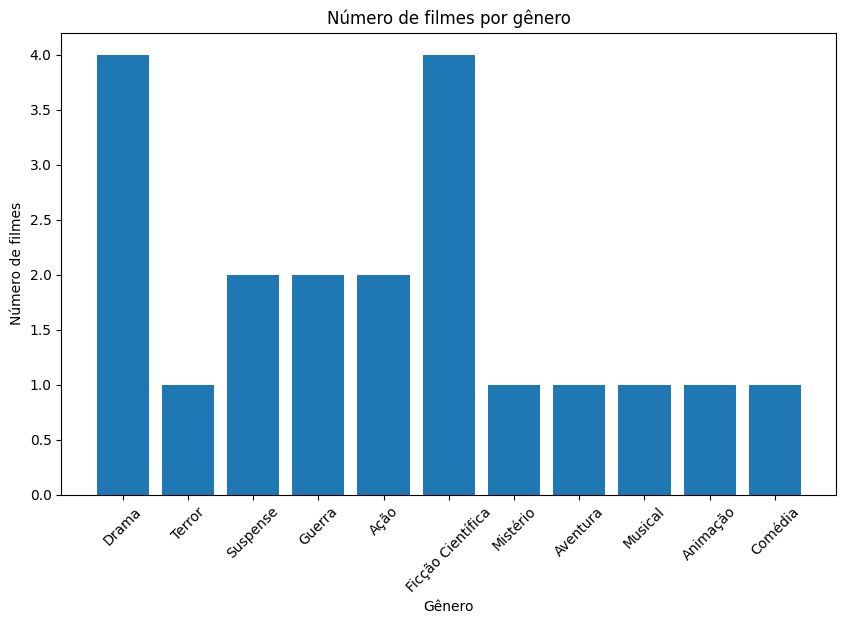

In [43]:
# Criando gráficos

plt.figure(figsize=(10,6))
plt.bar(genero_count_df['Genero'],genero_count_df['count'])
plt.xlabel('Gênero')
plt.ylabel('Número de filmes')
plt.title('Número de filmes por gênero')
plt.xticks(rotation=45)
plt.savefig('numero_filmes_por_genero.png')
plt.show()

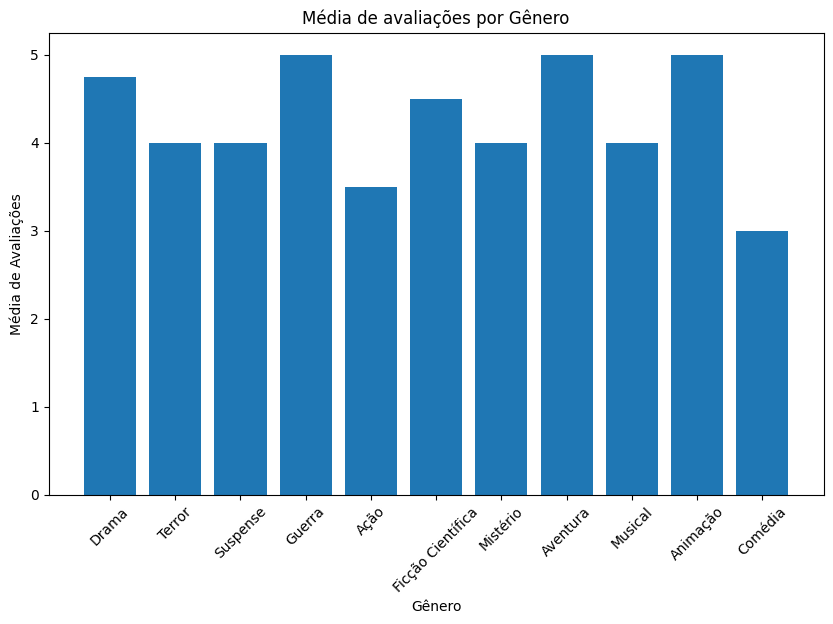

In [44]:
plt.figure(figsize=(10,6))
plt.bar(media_avaliacoes_genero_df['Genero'],media_avaliacoes_genero_df['avg(Avaliações)'])
plt.xlabel('Gênero')
plt.ylabel('Média de Avaliações')
plt.xticks(rotation=45)
plt.title('Média de avaliações por Gênero')
plt.savefig('Numero_de_avaliacoes_por_genero.png')
plt.show()

In [45]:
# Salvar os resultados em um novo arquivo Excel

with pd.ExcelWriter("analise_filmes.xlsx") as writer:
  spark_df.toPandas().to_excel(writer, sheet_name='Filmes', index=False)
  genero_count_df.to_excel(writer, sheet_name='Contagem por gênero', index=False)
  media_avaliacoes_genero_df.to_excel(writer, sheet_name='Média de Avaliações', index=False)

  print("Arquivo Excel 'Analise_filmes.xlsx' criado com sucesso!")


Arquivo Excel 'Analise_filmes.xlsx' criado com sucesso!


In [46]:
spark.stop()